### Generating the data
<b>yi = a*xi + b (and a = -2, b = 1)</b>

In [581]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

%matplotlib inline

In [582]:
x = np.linspace(0,20,50)
y = -2*x+1
x = x[:,np.newaxis]
y = y[:,np.newaxis]

### Batch/Vanilla, Mini-Batch and stochastic Gradient Descent implementation

In [583]:
def initialize_weights(col_dim,row_dim=1):
    return np.random.normal(size=(row_dim,col_dim))*0.01

In [584]:
def initialize_bias(weights_array):
    return np.insert(weights_array,0,0)

In [585]:
def initialize_theta(features_number):
    weights = initialize_weights(features_number)
    return initialize_bias(weights).reshape([-1,1])

In [586]:
def predict(input_data,weights):
    return np.matmul(input_data,weights)

In [587]:
def calc_mean_square_error(sample_number,output,predicted):
    return (1/(2*sample_number))*np.sum(np.power((predicted-output),2))

In [588]:
def calc_gradient(number_of_samples,predicted,output,input):
    return (1/number_of_samples)*np.sum((predicted-output)*input)

In [589]:
def calc_new_weights(weights,d_theta,lr):
    return (weights - (lr*d_theta))

In [590]:
def split_data(training_data,real_output,samples_number,batches):
    samples_per_batch = samples_number//batches
    data_batches = {}
    batch_data ={}
    current_batch_start_index = 0
    current_batch_end_index = samples_per_batch
    for batch in range(1,batches+1):
        batch_data["training_batch_data"] = training_data[current_batch_start_index:current_batch_end_index]
        batch_data["real_output"] = real_output[current_batch_start_index:current_batch_end_index]
        data_batches[batch] = batch_data.copy()
        current_batch_start_index += samples_per_batch
        if batch == batches:
            current_batch_end_index = len(training_data)
        else:
            current_batch_end_index += samples_per_batch
    return data_batches

In [591]:
def prepare_theta_history(theta_matrix):
    theta_dict = {}
    for _,matrix in theta_matrix.items():
        for index,theta in enumerate(matrix):
            if "theta_"+str(index) in theta_dict.keys():
                theta_dict["theta_"+str(index)].append(theta)
            else:
                theta_dict["theta_"+str(index)] = [theta]
    return theta_dict

In [592]:
def solve_using_gradient_descent(training_data,real_output,epochs,lr=0.0001,batches=1):
    cost_history = {}
    theta_history = {}
    epoch_index = 0
    samples_number = training_data.shape[0]
    features_number = training_data.shape[1] - 1
    theta_matrix = initialize_theta(features_number)
    for epoch in range(1,epochs+1):
        for batch in range(1,batches+1):
            data_batches = split_data(training_data,real_output,samples_number,batches)
            training_data_batch = data_batches[batch]["training_batch_data"]
            real_output_data_batch = data_batches[batch]["real_output"]
            batch_samples_number = training_data_batch.shape[0]
            predicted_output = predict(training_data_batch,theta_matrix)
            cost = calc_mean_square_error(batch_samples_number,real_output_data_batch,predicted_output)
            d_theta = calc_gradient(batch_samples_number,predicted_output,real_output_data_batch,training_data_batch)
            theta_matrix = calc_new_weights(theta_matrix,d_theta,lr)
            cost_history[batch+epoch_index] = cost
            theta_history[batch+epoch_index] = theta_matrix
            print(f"Epoch:{epoch} of {epochs}, Batch: {batch}\nCost: {cost}, Gradient: {d_theta}")
        print(f"R2 Score: {r2_score(real_output,predict(training_data,theta_matrix))}")
        if epoch > 1 and (d_theta <= 0.00001 or sum(theta_history[batch+epoch_index-2]-theta_matrix)/len(theta_matrix) <= 0.00001 or cost_history[batch+epoch_index-2]-cost <= 0.00001):
            break
        epoch_index += (batches+1)
    theta_history = prepare_theta_history(theta_history)
    predicted_output = predict(training_data,theta_matrix)
    return {"weights_matrix":theta_matrix,"predicted_output":predicted_output,"epochs_history":cost_history,"theta_history":theta_history}

In [593]:
def print_theta(fig,cost_history,theta_history):
    index = 413
    for key,value in theta_history.items():
        ax = fig.add_subplot(index)
        ax.xaxis.label.set_color('white')
        ax.yaxis.label.set_color('white')
        ax.tick_params(axis='x', colors='white')
        ax.tick_params(axis='y', colors='white')
        ax.plot(value,np.array(list(cost_history.values())).flatten(),"-r",label="predicted output")
        ax.set_xlabel("loss")
        ax.set_ylabel(key)
        ax.grid()
        ax.legend()
        index += 1

In [594]:
def prepare_input_data_for_training(data):
    if len(data.shape)<2:
        data = data[:,np.newaxis]
    return np.insert(data,0,1,axis=1)

In [595]:
def print_graph(fig,raw_input_data,predicted_output,raw_output_data):
    ax1 = fig.add_subplot(411)
    ax1.xaxis.label.set_color('white')
    ax1.yaxis.label.set_color('white')
    ax1.tick_params(axis='x', colors='white')
    ax1.tick_params(axis='y', colors='white')
    ax1.plot(raw_input_data,raw_output_data,"bo",label="true output")
    ax1.plot(raw_input_data,predicted_output,"-r",label="predicted output")
    ax1.set_xlabel("input")
    ax1.set_ylabel("output")
    ax1.grid()
    ax1.legend()

In [596]:
def print_debug_graph(fig,history):
    ax2 = fig.add_subplot(412)
    ax2.xaxis.label.set_color('white')
    ax2.yaxis.label.set_color('white')
    ax2.tick_params(axis='x', colors='white')
    ax2.tick_params(axis='y', colors='white')
    ax2.plot(np.array(list(history.values())).flatten(),"-bo",label="true output")
    ax2.set_xlabel("Batches")
    ax2.set_ylabel("Cost")
    ax2.grid()
    ax2.legend()

Epoch:1 of 100, Batch: 1
Cost: 251.51632738959364, Gradient: 279.29474298978533
R2 Score: -1.588111795925022
Epoch:2 of 100, Batch: 1
Cost: 179.5832674723485, Gradient: 235.81026147409008
R2 Score: -0.8491098619034636
Epoch:3 of 100, Batch: 1
Cost: 128.3055822545261, Gradient: 199.0960474988689
R2 Score: -0.32231024303955547
Epoch:4 of 100, Batch: 1
Cost: 91.75213931294877, Gradient: 168.09801185868787
R2 Score: 0.05322035527016877
Epoch:5 of 100, Batch: 1
Cost: 65.69491412411075, Gradient: 141.92618058379136
R2 Score: 0.32091840442781416
Epoch:6 of 100, Batch: 1
Cost: 47.11994744786596, Gradient: 119.82914320269452
R2 Score: 0.5117477159282975
Epoch:7 of 100, Batch: 1
Cost: 33.87872991517936, Gradient: 101.17247925385051
R2 Score: 0.6477809303739632
Epoch:8 of 100, Batch: 1
Cost: 24.43969054548011, Gradient: 85.42054365736838
R2 Score: 0.7447525920485571
Epoch:9 of 100, Batch: 1
Cost: 17.711044633365425, Gradient: 72.12108799283648
R2 Score: 0.8138791153484078
Epoch:10 of 100, Batch: 

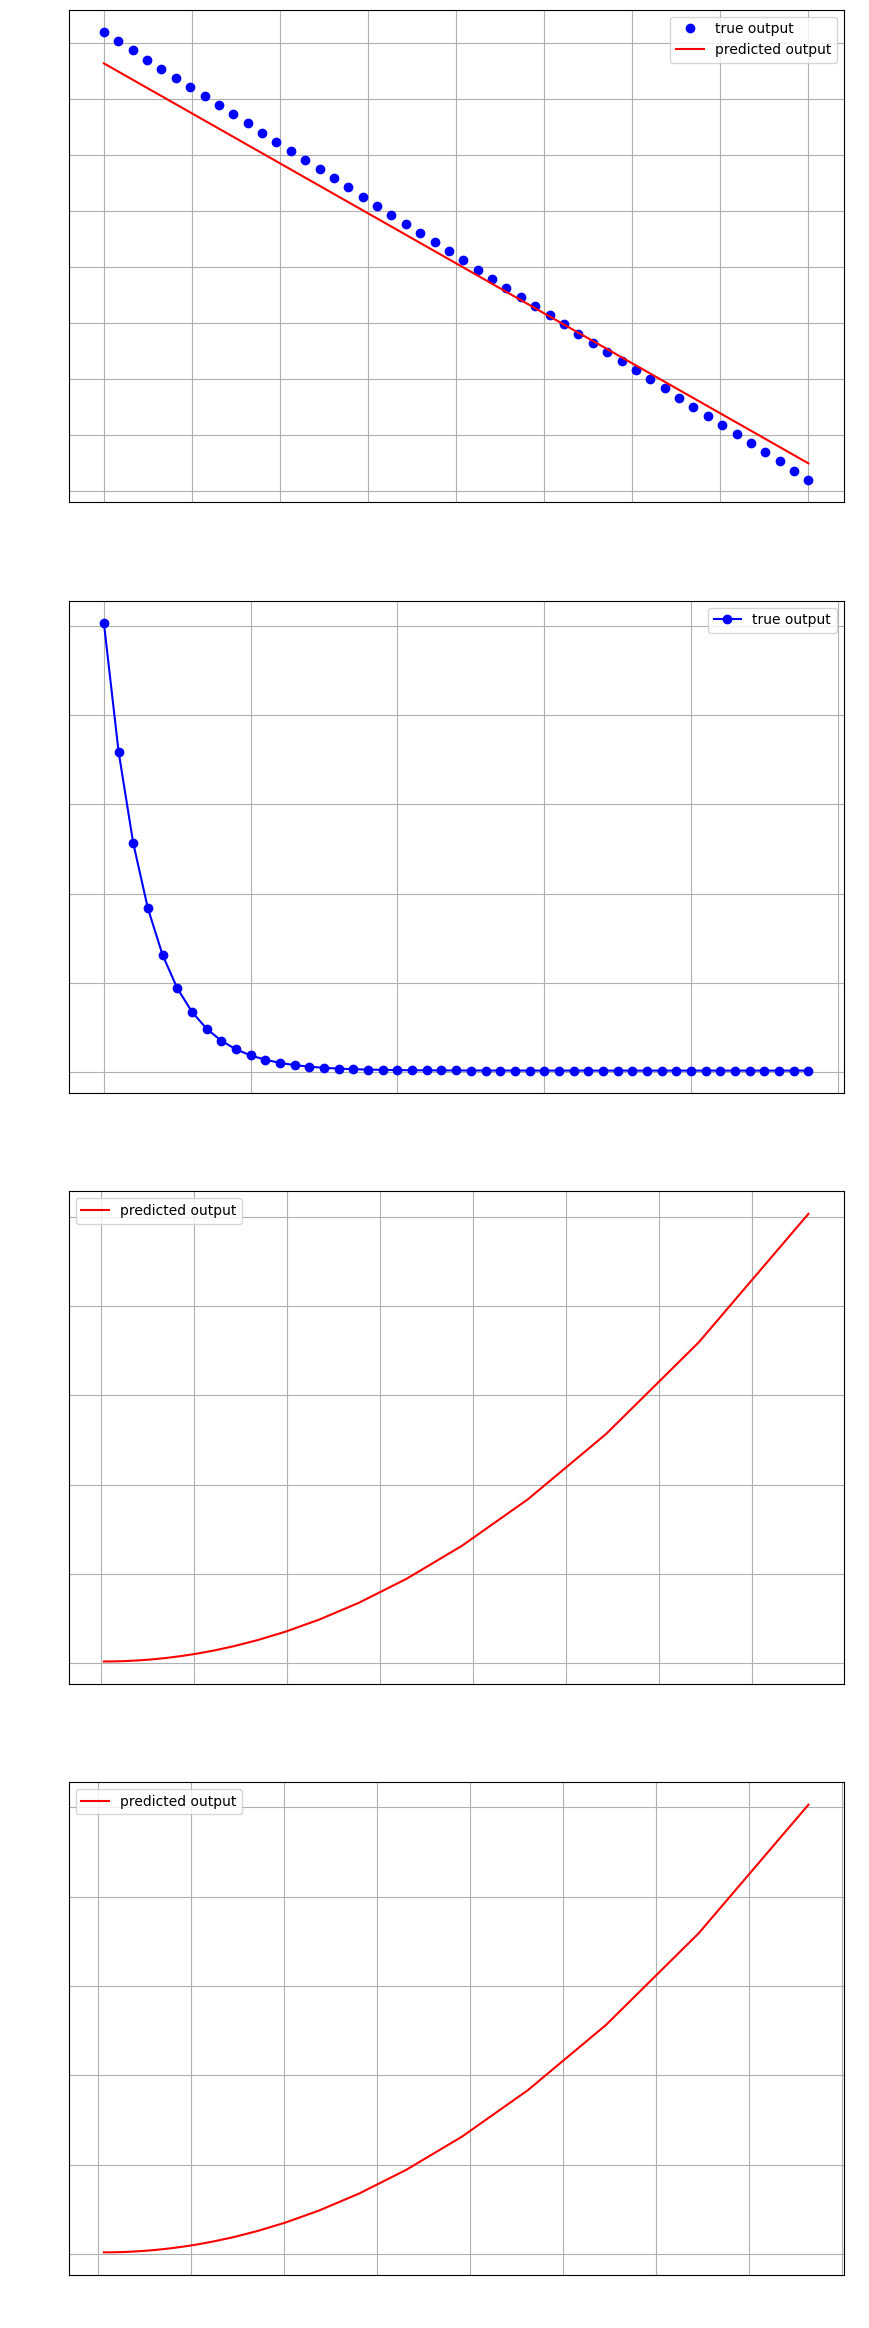

In [597]:
if __name__ == "__main__":
    raw_input_data = x
    raw_output_data = y
    prepared_input_data = prepare_input_data_for_training(raw_input_data)
    model_results = solve_using_gradient_descent(prepared_input_data,raw_output_data,100,0.001,1)
    fig = plt.figure(figsize=(10, 30), dpi=100)
    print_graph(fig,raw_input_data,model_results["predicted_output"],raw_output_data)
    print_debug_graph(fig,model_results["epochs_history"])
    print_theta(fig,model_results["epochs_history"],model_results["theta_history"])

### Momentum Gradient Descent implementation

In [598]:
def calc_new_momentum_weights(weights,d_theta,lr,gamma,momentum):
    momentum = ((gamma*momentum)+(lr*d_theta))
    return (weights - momentum),momentum

In [599]:
def solve_using_momentum_gradient_descent(training_data,real_output,epochs,gamma,lr=0.0001,batches=1):
    cost_history = {}
    theta_history = {}
    momentum = 0
    epoch_index = 0
    samples_number = training_data.shape[0]
    features_number = training_data.shape[1] - 1
    theta_matrix = initialize_theta(features_number)
    for epoch in range(1,epochs+1):
        for batch in range(1,batches+1):
            data_batches = split_data(training_data,real_output,samples_number,batches)
            training_data_batch = data_batches[batch]["training_batch_data"]
            real_output_data_batch = data_batches[batch]["real_output"]
            batch_samples_number = training_data_batch.shape[0]
            predicted_output = predict(training_data_batch,theta_matrix)
            cost = calc_mean_square_error(batch_samples_number,real_output_data_batch,predicted_output)
            d_theta = calc_gradient(batch_samples_number,predicted_output,real_output_data_batch,training_data_batch)
            theta_matrix,momentum = calc_new_momentum_weights(theta_matrix,d_theta,lr,gamma,momentum)
            cost_history[batch+epoch_index] = cost
            theta_history[batch+epoch_index] = theta_matrix
            print(f"Epoch:{epoch} of {epochs}, Batch: {batch}\nCost: {cost}, Gradient: {d_theta}")
        print(f"R2 Score: {r2_score(real_output,predict(training_data,theta_matrix))}")
        if epoch > 1 and (d_theta <= 0.00001 or sum(theta_history[batch+epoch_index-2]-theta_matrix)/len(theta_matrix) <= 0.00001 or cost_history[batch+epoch_index-2]-cost <= 0.00001):
            break
        epoch_index += (batches+1)
    theta_history = prepare_theta_history(theta_history)
    return {"weights_matrix":theta_matrix,"predicted_output":predicted_output,"epochs_history":cost_history,"theta_history":theta_history}

In [600]:
if __name__ == "__main__":
    raw_input_data = x
    raw_output_data = y
    prepared_input_data = prepare_input_data_for_training(raw_input_data)
    model_results = solve_using_momentum_gradient_descent(prepared_input_data,raw_output_data,500,0.9,0.001)
    fig = plt.figure(figsize=(10, 30), dpi=100)
    print_graph(fig,raw_input_data,model_results["predicted_output"],raw_output_data)
    print_debug_graph(fig,model_results["epochs_history"])
    print_theta(fig,model_results["epochs_history"],model_results["theta_history"])

Epoch:1 of 500, Batch: 1
Cost: 246.7498668309772, Gradient: 276.6318189712128
R2 Score: -1.5390928558536205


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Nesterov Accelerated Gradient Descent implementation

In [ ]:
def calc_temp_weights(weights,gamma,momentum):
    return (weights - (gamma*momentum))

In [ ]:
def calc_new_nesterov_weights(temp_weights,temp_d_theta,lr,gamma,momentum):
    momentum = ((gamma*momentum)+(lr*temp_d_theta))
    return (temp_weights - (lr*temp_d_theta)),momentum

In [ ]:
def nesterov_acceleration_weight_update(theta_matrix,gamma,lr,momentum,training_data_batch,batch_samples_number,real_output_data_batch):
    temp_theta_matrix = calc_temp_weights(theta_matrix,gamma,momentum)
    temp_predicted_output = predict(training_data_batch,temp_theta_matrix)
    temp_d_theta = calc_gradient(batch_samples_number,temp_predicted_output,real_output_data_batch,training_data_batch)
    return calc_new_nesterov_weights(temp_theta_matrix,temp_d_theta,lr,gamma,momentum)

In [ ]:
def solve_using_nesterov_accelerated_gradient_descent(training_data,real_output,epochs,gamma,lr=0.0001,batches=1):
    cost_history = {}
    theta_history = {}
    momentum = 0
    epoch_index = 0
    samples_number = training_data.shape[0]
    features_number = training_data.shape[1] - 1
    theta_matrix = initialize_theta(features_number)
    for epoch in range(1,epochs+1):
        for batch in range(1,batches+1):
            data_batches = split_data(training_data,real_output,samples_number,batches)
            training_data_batch = data_batches[batch]["training_batch_data"]
            real_output_data_batch = data_batches[batch]["real_output"]
            batch_samples_number = training_data_batch.shape[0]
            predicted_output = predict(training_data,theta_matrix)
            cost = calc_mean_square_error(batch_samples_number,real_output_data_batch,predicted_output)
            d_theta = calc_gradient(batch_samples_number,predicted_output,real_output_data_batch,training_data_batch)
            theta_matrix,momentum = nesterov_acceleration_weight_update(theta_matrix,gamma,lr,momentum,training_data_batch,batch_samples_number,real_output_data_batch)
            cost_history[batch+epoch_index] = cost
            theta_history[batch+epoch_index] = theta_matrix
            print(f"Epoch:{epoch} of {epochs}, Batch: {batch}\nCost: {cost}, Gradient: {d_theta}")
        print(f"R2 Score: {r2_score(real_output,predict(training_data,theta_matrix))}")
        if epoch > 1 and (d_theta <= 0.00001 or sum(theta_history[batch+epoch_index-2]-theta_matrix)/len(theta_matrix) <= 0.00001 or cost_history[batch+epoch_index-2]-cost <= 0.00001):
            break
        epoch_index += (batches+1)
    theta_history = prepare_theta_history(theta_history)
    return {"weights_matrix":theta_matrix,"predicted_output":predicted_output,"epochs_history":cost_history,"theta_history":theta_history}

In [ ]:
if __name__ == "__main__":
    raw_input_data = x
    raw_output_data = y
    prepared_input_data = prepare_input_data_for_training(raw_input_data)
    model_results = solve_using_nesterov_accelerated_gradient_descent(prepared_input_data,raw_output_data,500,0.9,0.001)
    fig = plt.figure(figsize=(10, 30), dpi=100)
    print_graph(fig,raw_input_data,model_results["predicted_output"],raw_output_data)
    print_debug_graph(fig,model_results["epochs_history"])
    print_theta(fig,model_results["epochs_history"],model_results["theta_history"])